# Exercício 01 - Implementação do Perceptron

Aluno: Frederico Luis de Azevedo

Professor: Dr. Francisco de Assis Boldt

## Bibliotecas e Inicialização

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

## Carregamento dos Dados

In [2]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data.data.shape

(569, 30)

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## Divisão de Treino e Teste

In [5]:
X,y = data.data,data.target
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(569, 30) (569,)
(381, 30) (188, 30) (381,) (188,)


## Implementação do Perceptron como Classificador

In [39]:
class Perceptron(BaseEstimator):
    
    def __init__(self, n):
        self.n = n
        self.w = []
        self.max_epochs = 1000
        
    def fit(self, X, y):
        
        epochs = 0
        
        # Inicializando vetor de pesos com valores aleatórios
        for i in range(len(X[0])):
            self.w.append(random.random())
        
        while True:
            
            has_error = False

            for i in range(len(X)):
                aux = 0

                for j in range(len(X[i])):
                    aux += X[i][j] * self.w[j]

                result_temp = self._0_1(aux)

                # Avaliando resultado
                if result_temp != y[i]:
                    
                    has_error = True
                    
                    error = y[i] - result_temp
                   
                    # Ajustando os pesos para cada elemento da amostra
                    for j in range(len(X[i])):
                        self.w[j] = self.w[j] + self.n * error * X[i][j]
            
            epochs += 1
            
            # O Treinamento será feito até não haver erros ou atingir a quantidade máxima de epocas
            if epochs > self.max_epochs or not has_error:
                break
    
    def predict(self, X):
        
        results = []
        
        for i in range(len(X)):
            aux = 0
            
            for j in range(len(X[i])):
                aux += X[i][j] * self.w[j]
            
            results.append(self._0_1(aux))
                
        return results
    
    def _0_1(self,x):
        if x >= 0.0:
            return 1
        else:
            return 0

In [40]:
n = 0.5 # Taxa de Aprendizado
perceptron = Perceptron(n)

## Fase de treinamento do Perceptron

In [41]:
perceptron.fit(X_train,y_train)

## Fase do Perceptron predizendo novos Valores

In [42]:
y_pred = perceptron.predict(X_test)

## Avaliando resultados

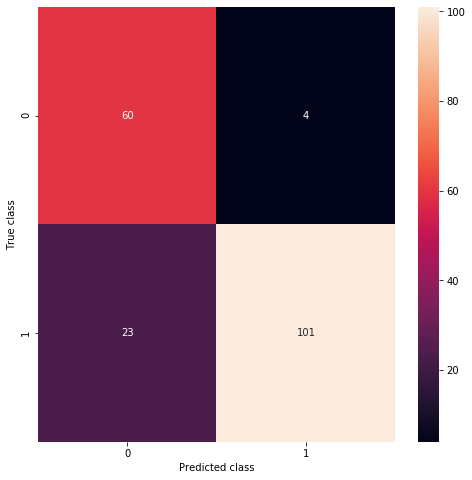

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [44]:
print('Accuracy\t|', accuracy_score(y_test, y_pred))

Accuracy	| 0.8563829787234043
